In [1]:
%%bash
pip install --no-cache-dir -qU pip wheel
pip install --no-cache-dir -qU numpy pandas matplotlib seaborn scikit-learn
pip install --no-cache-dir -qU tensorflow-gpu
pip check

No broken requirements found.


# Weight and bias initialisers

In this reading we investigate different ways to initialise weights and biases in the layers of neural networks.

In [2]:
import os
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set(font="DejaVu Sans")

import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.get_logger().setLevel('ERROR')

### Visualising the initialised weights and biases

We can see the effect of our initialisers on the weights and biases by plotting histograms of the resulting values. Compare these plots with the selected initialisers for each layer below.

In [3]:
# Plot histogram of weight and bias values
def plot_weight(model):
    # Filter out the pooling and flatten layers, 
    # that don't have any weights
    weight_layers = [layer for layer in model.layers 
        if len(layer.weights) > 0]
    
    nrow = int(len(weight_layers))
    fig, axes = plt.subplots(nrow, 2, figsize=(12, nrow*3))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    for i, layer in enumerate(weight_layers):
        for j in [0, 1]:
            axes[i, j].hist(layer.weights[j].numpy().flatten(), 
                align='left')
            axes[i, j].set_title(layer.weights[j].name)

### Default weights and biases

In the models we have worked with so far, we have not specified the initial values of the weights and biases in each layer of our neural networks.

The default values of the weights and biases in TensorFlow depend on the type of layers we are using.

For example, in a `Dense` layer, the biases are set to zero (`zeros`) by default, while the weights are set according to `glorot_uniform`, the Glorot uniform initialiser.

The Glorot uniform initialiser draws the weights uniformly at random from the closed interval $[-c, c]$, where 
$$c = \sqrt{\frac{6}{n_{input}+n_{output}}}$$
and $n_{input}$ and $n_{output}$ are the number of inputs to, and outputs from the layer respectively.

### Initializing your own weights and biases
We often would like to initialise our own weights and biases, and TensorFlow makes this process quite straightforward.

When we construct a model in TensorFlow, each layer has optional arguments `kernel_initialiser` and `bias_initialiser`, which are used to set the weights and biases respectively.

If a layer has no weights or biases (e.g. it is a max pooling layer), then trying to set either `kernel_initialiser` or `bias_initialiser` will throw an error.

Let's see an example, which uses some of the different initialisations available in Keras.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 126, 16)           3088      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 31, 16)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 496)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                31808     
                                                                 
Total params: 34,896
Trainable params: 34,896
Non-trainable params: 0
_________________________________________________________________


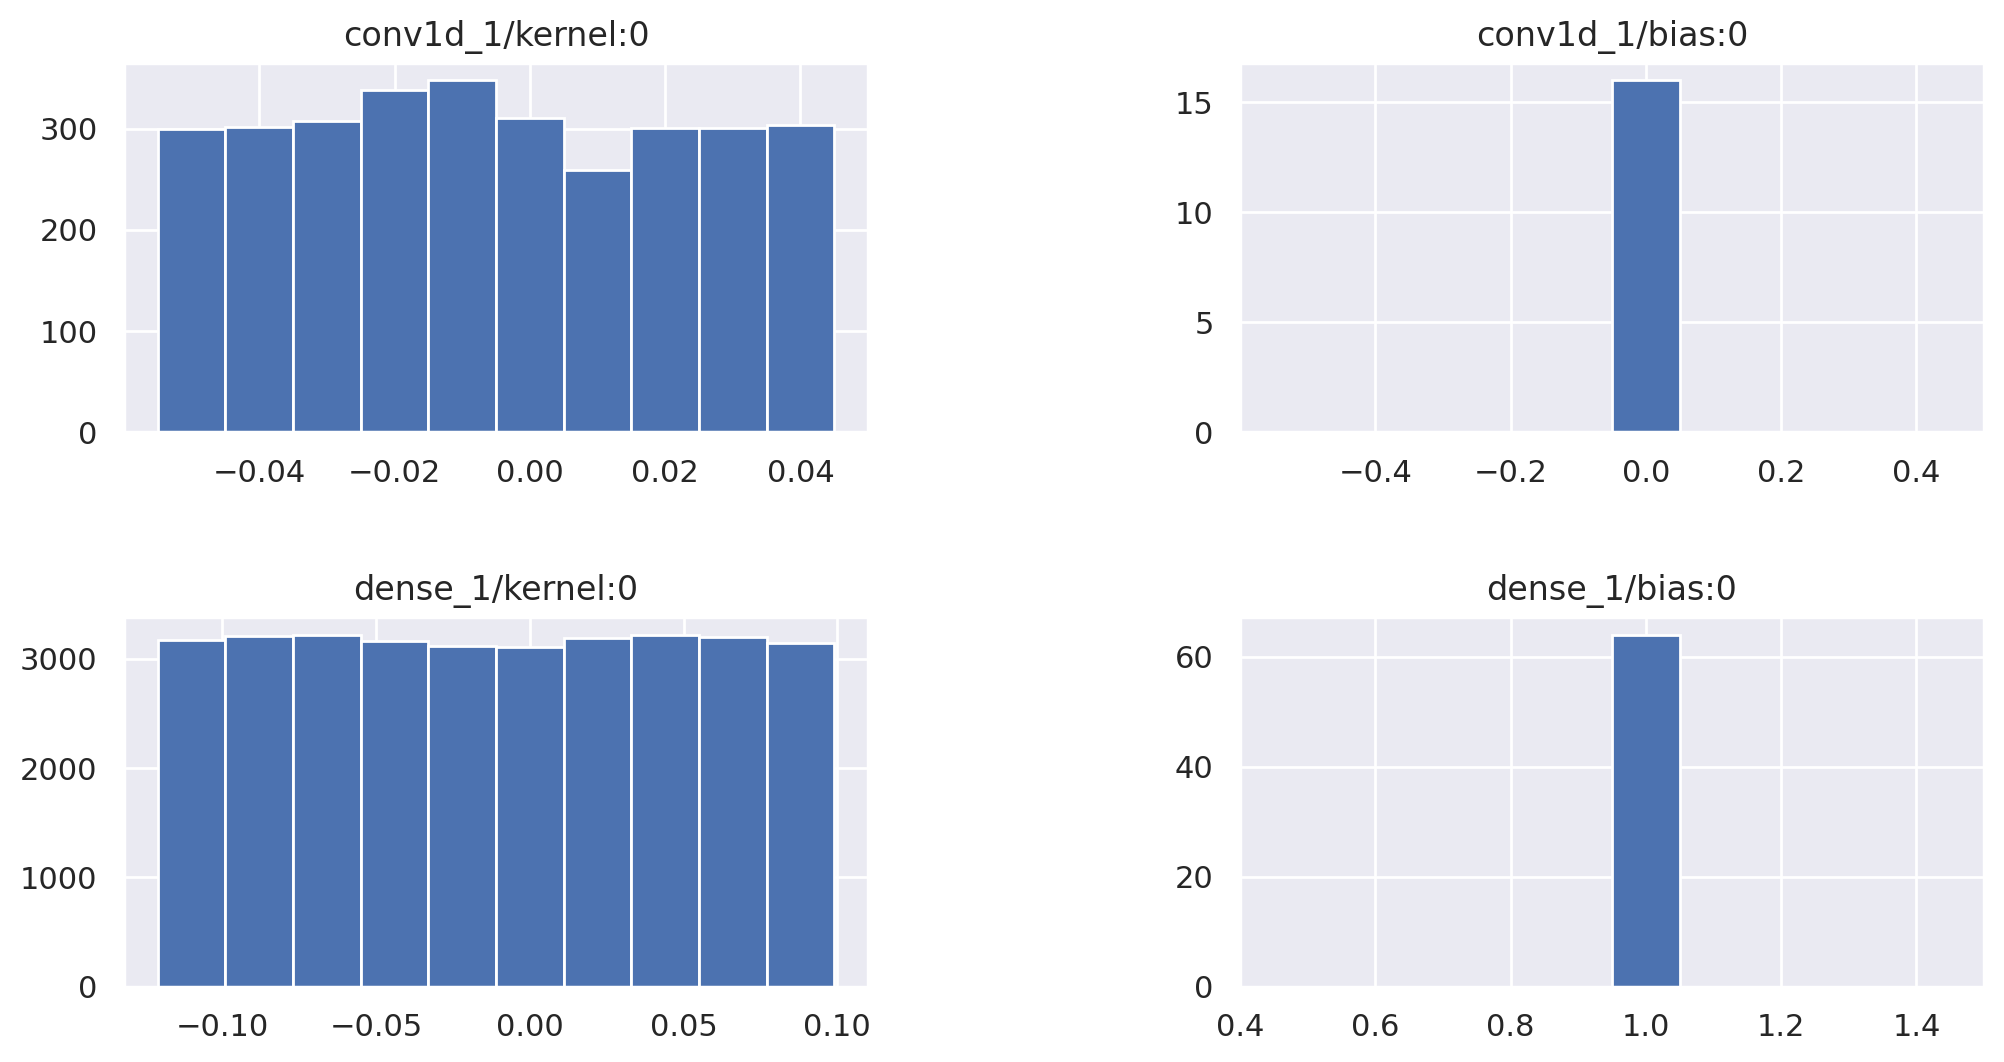

In [5]:
# Construct a model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu',
        kernel_initializer=tf.keras.initializers.RandomUniform(), 
        bias_initializer=tf.keras.initializers.Zeros(),
        input_shape=(128, 64)),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu', 
        kernel_initializer=tf.keras.initializers.HeUniform(), 
        bias_initializer=tf.keras.initializers.Ones())
])

model.summary()
plot_weight(model)

As the following example illustrates, we can also instantiate initialisers in a slightly different manner, allowing us to set optional arguments of the initialisation method.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 126, 16)           3088      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 31, 16)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 496)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                31808     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                      

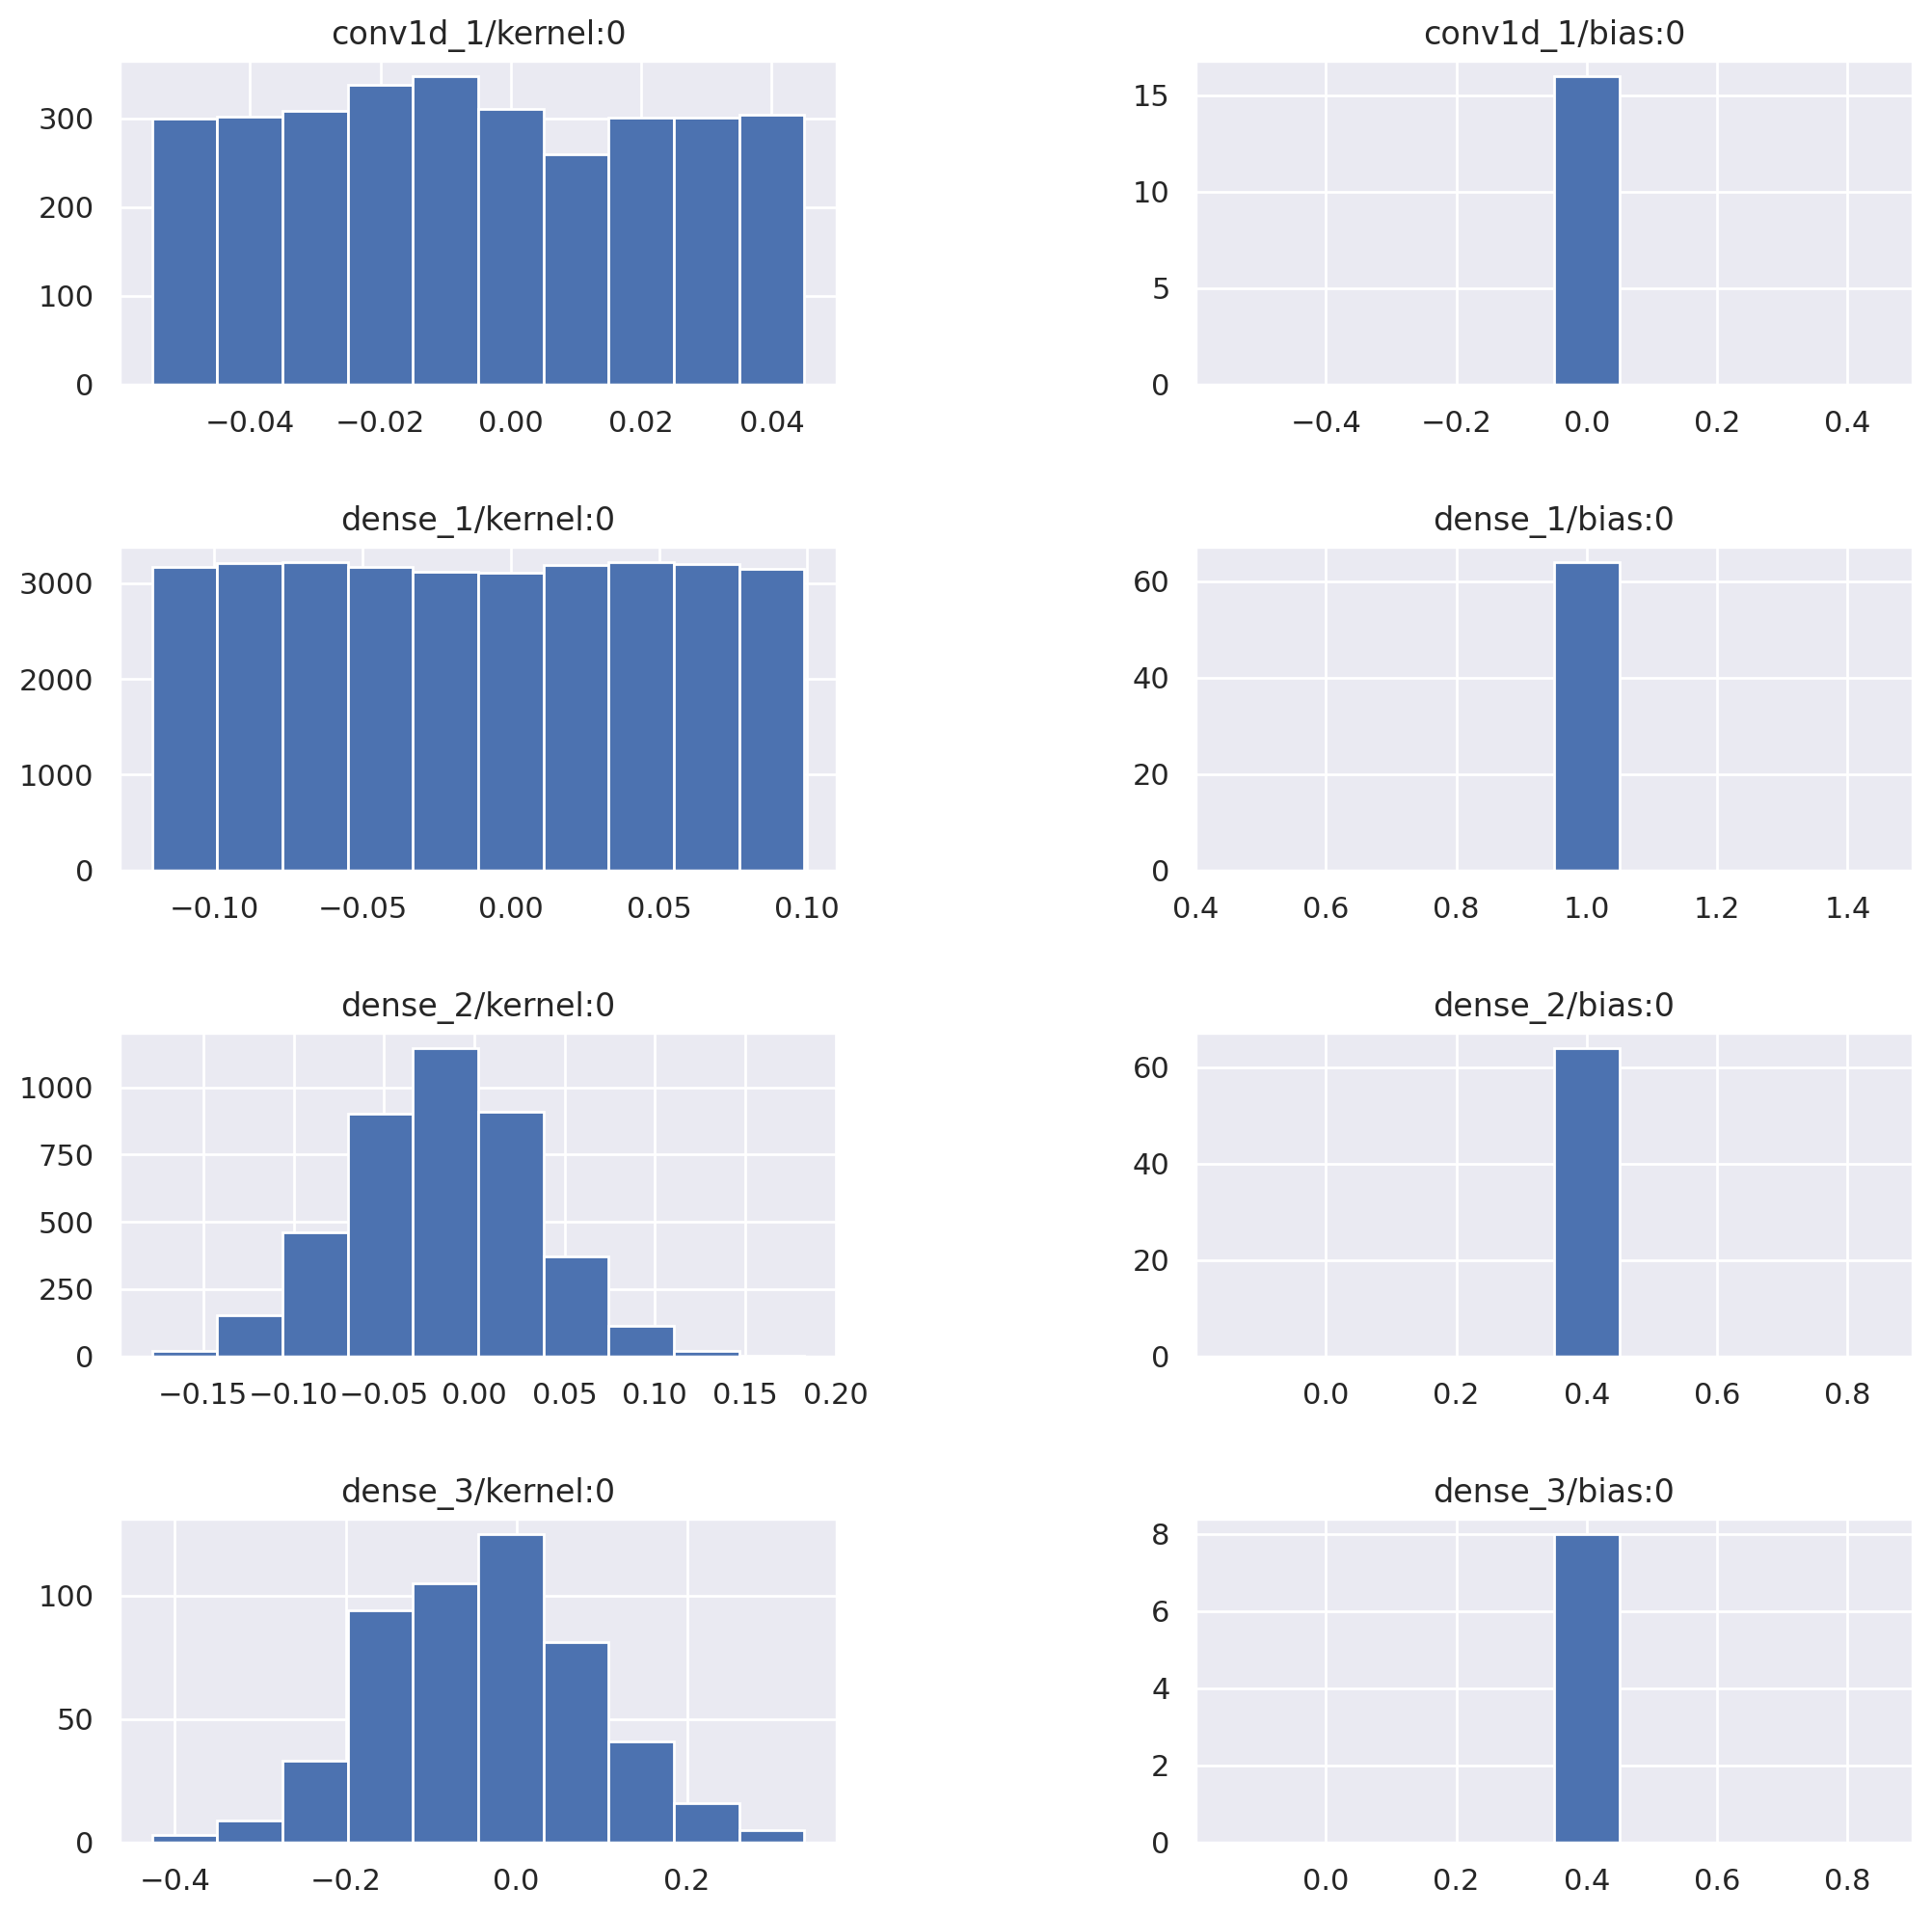

In [6]:
# Add some layers to our model
model.add(tf.keras.layers.Dense(units=64, activation='relu',
    kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
    bias_initializer=tf.keras.initializers.Constant(value=0.4)))

model.add(tf.keras.layers.Dense(units=8, activation='relu', 
    kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None),
    bias_initializer=tf.keras.initializers.Constant(value=0.4)))

model.summary()
plot_weight(model)

### Custom weight and bias initialisers
It is also possible to define your own weight and bias initialisers. Initialisers must take in two arguments, the `shape` of the tensor to be initialised, and its `dtype`.

Here is a small example, which also shows how you can use your custom initializer in a layer.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 126, 16)           3088      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 31, 16)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 496)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                31808     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                      

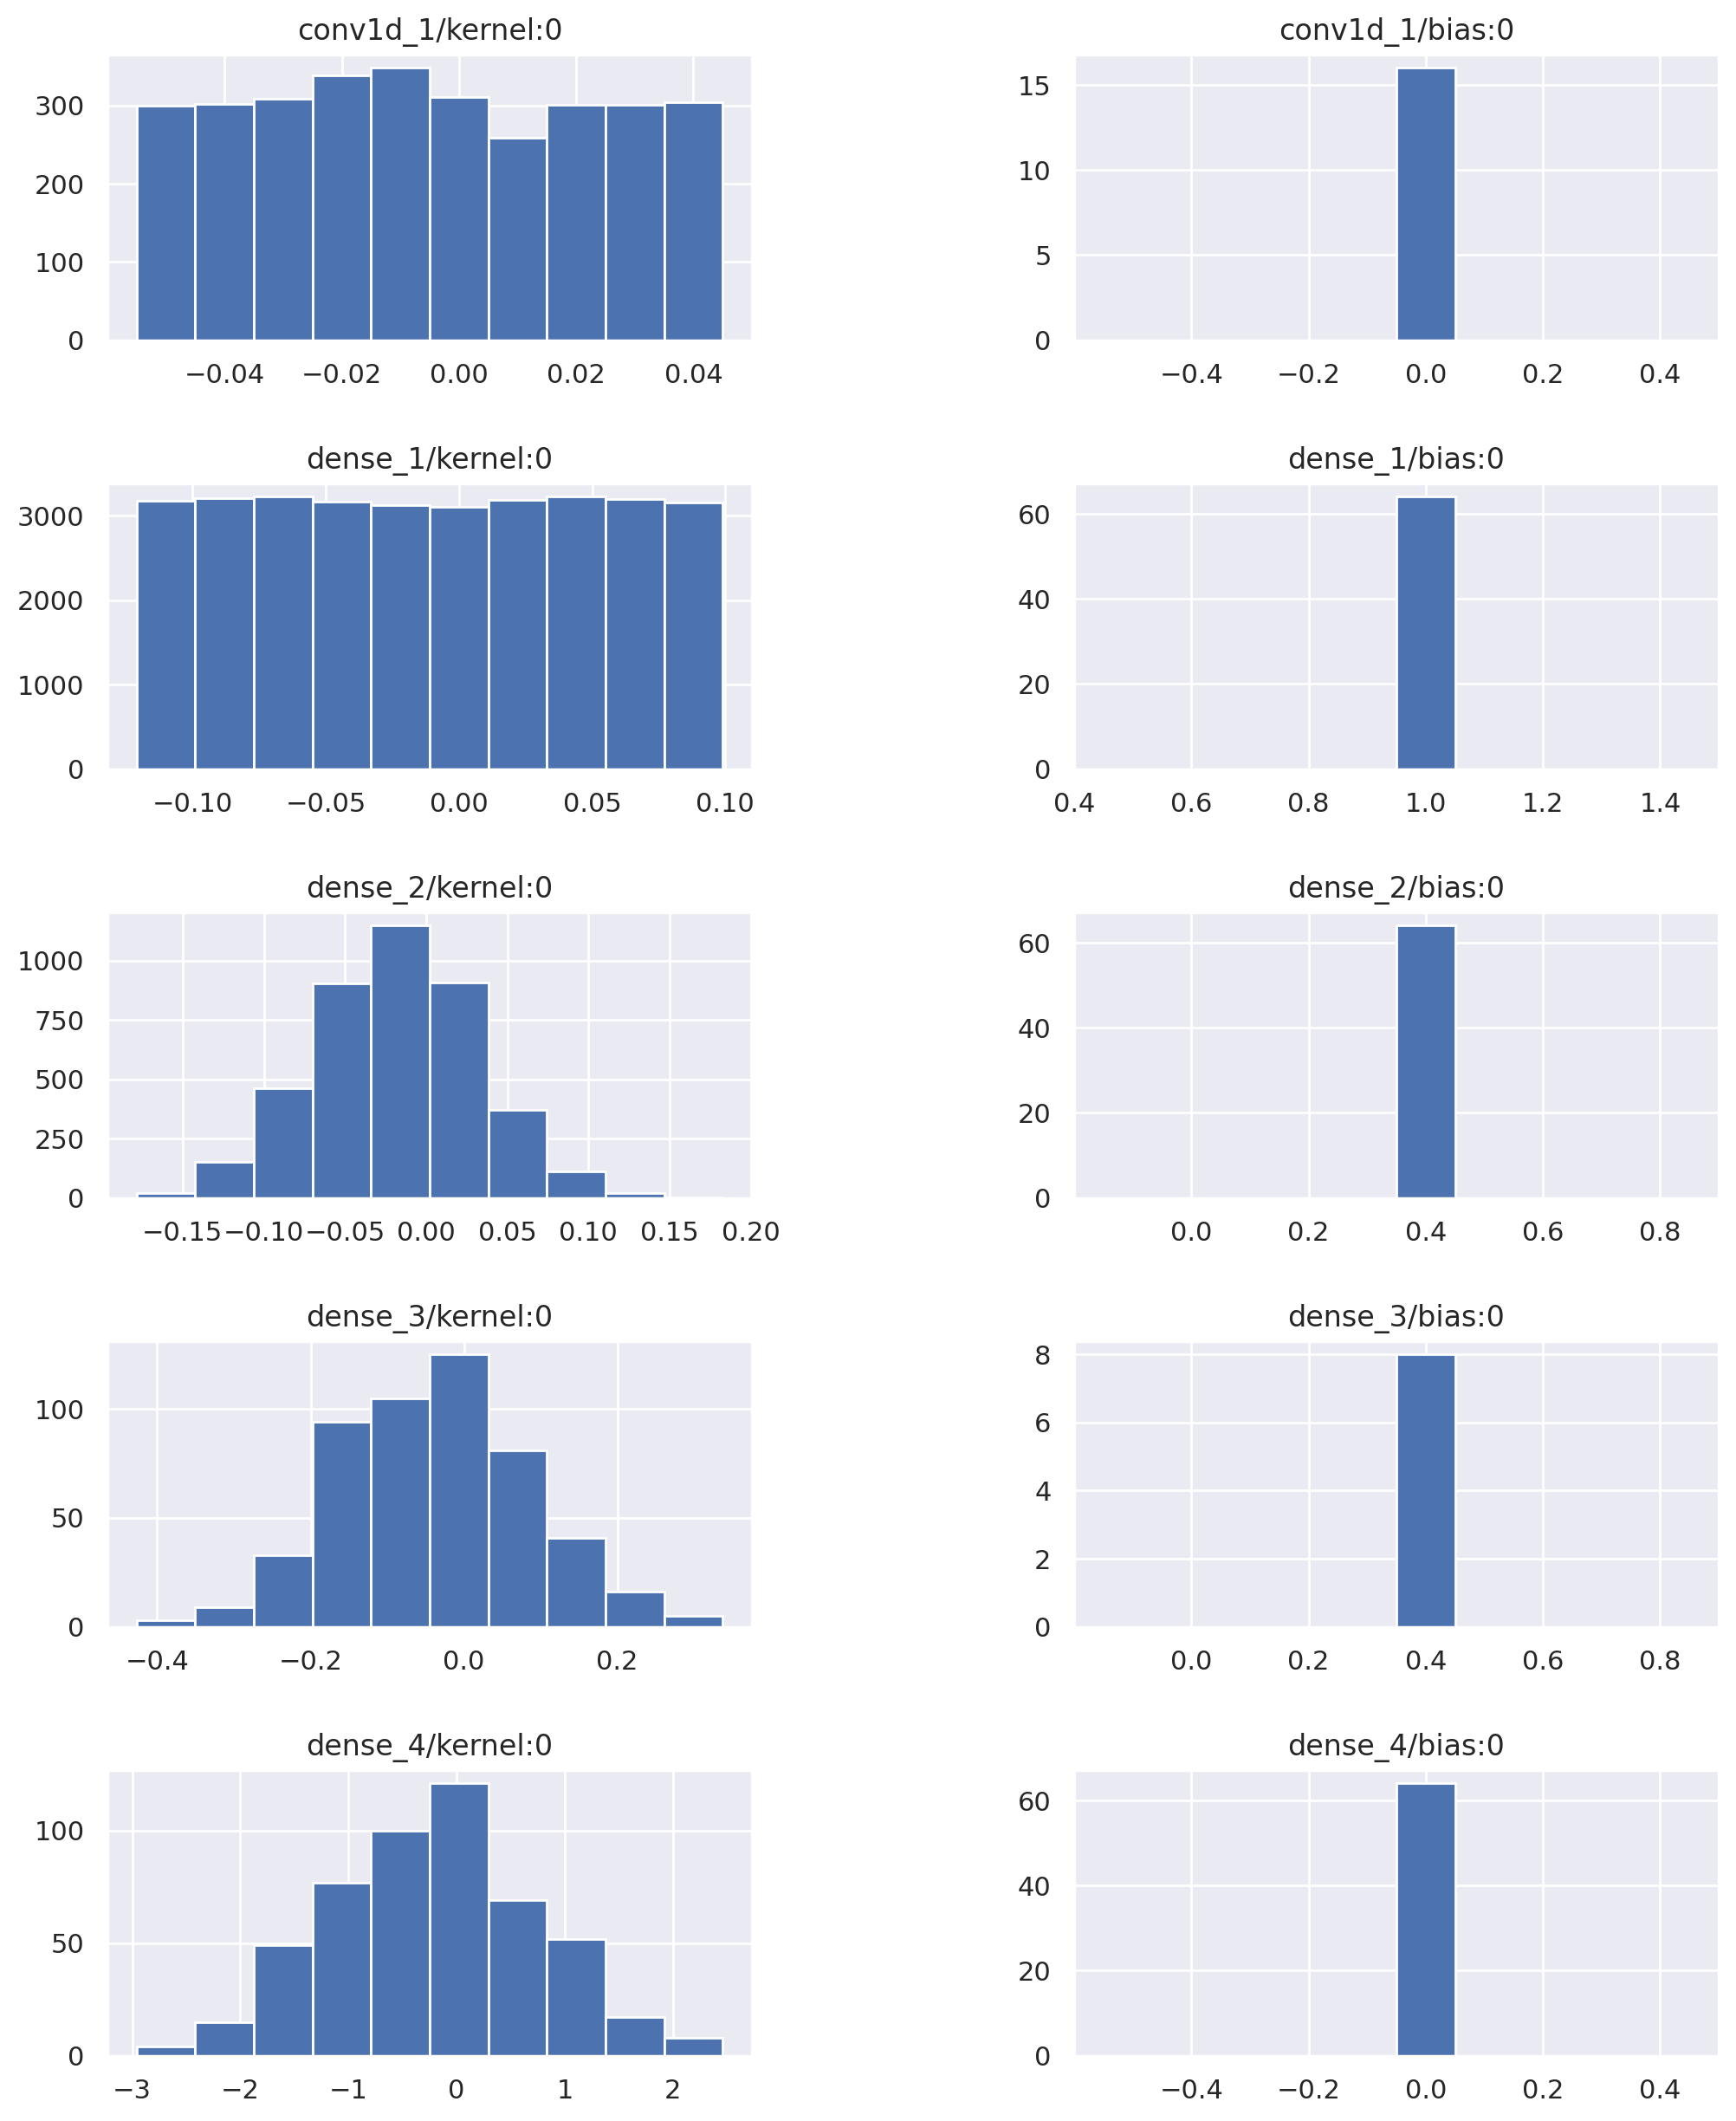

In [7]:
# Define a custom initializer
def my_init(shape, dtype=None):
    return tf.keras.backend.random_normal(shape, dtype=dtype)

model.add(tf.keras.layers.Dense(units=64, kernel_initializer=my_init))

# Let's take a look at the summary of our finalised model
# Print the model summary
model.summary()
plot_weight(model)

## Further reading and resources
* https://keras.io/initializers/
* https://www.tensorflow.org/versions/r2.2/api_docs/python/tf/keras/initializers